In [1]:
import pandas as pd
import numpy as np

In [14]:
#一号风机的风速
df = pd.read_csv('./Turb1.csv')
print(df.columns)
data = df[['TurbID', 'Day', 'Wspd', 'Wdir', 'Etmp', 'Itmp', 'Ndir',
       'Pab1', 'Pab2', 'Pab3', 'Prtv', 'Patv']]
corr = df.corr()

Index(['TurbID', 'Day', 'Tmstamp', 'Wspd', 'Wdir', 'Etmp', 'Itmp', 'Ndir',
       'Pab1', 'Pab2', 'Pab3', 'Prtv', 'Patv'],
      dtype='object')


C:\Users\92469\AppData\Local\Temp\ipykernel_13440\1047297125.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


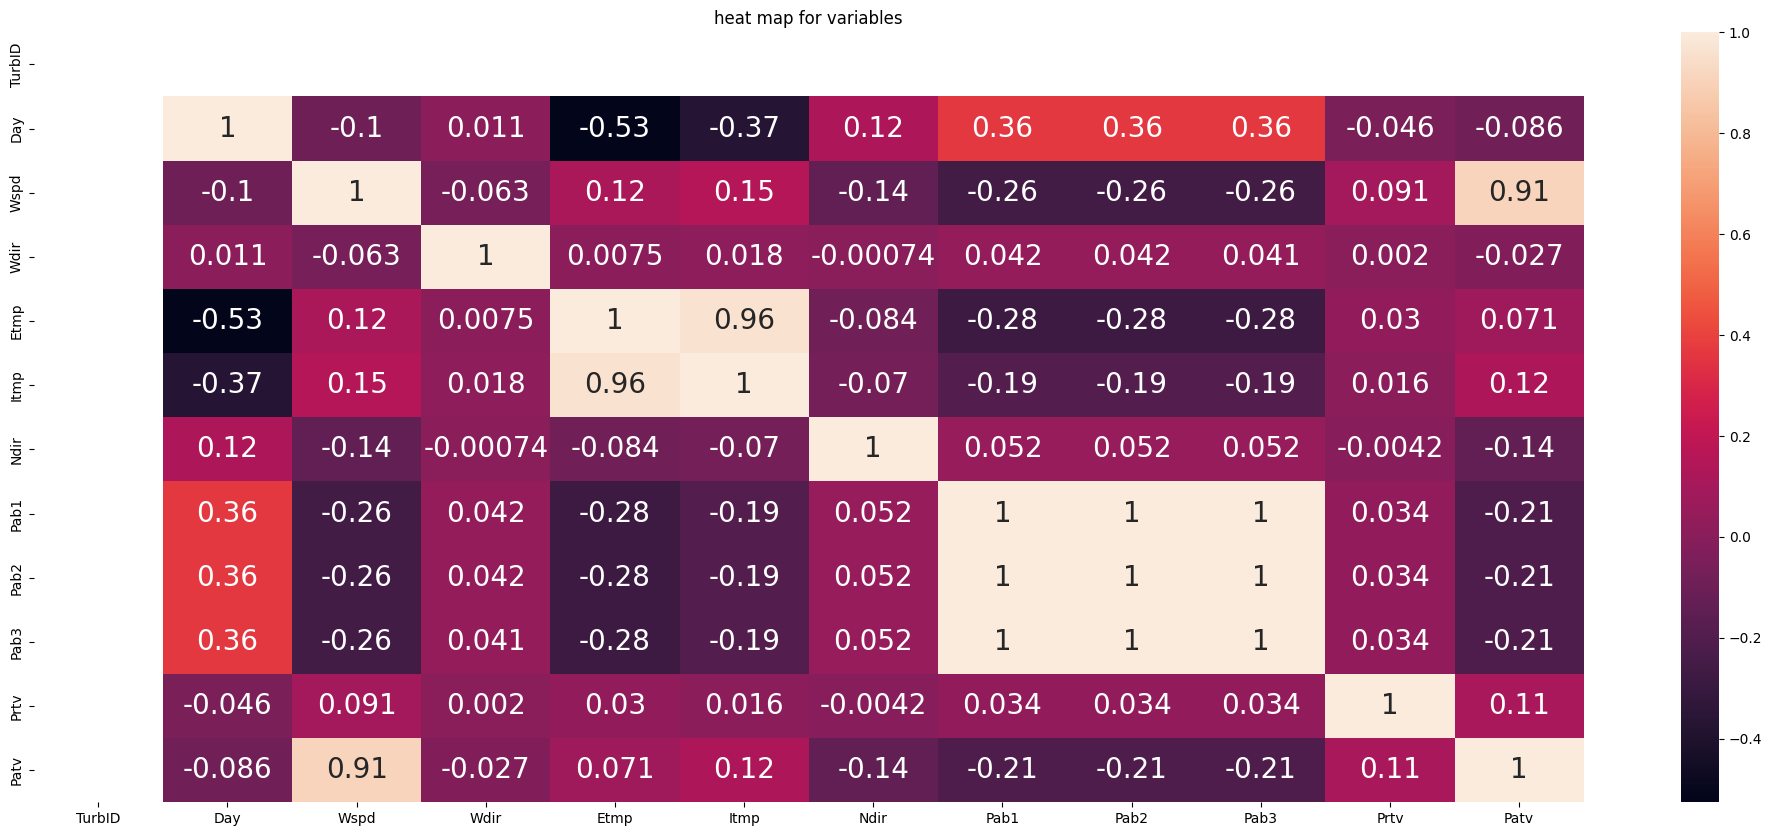

In [15]:
#绘制变量之间的热力图
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(25,10))
ax = sns.heatmap(corr,annot=True,square=False,annot_kws={"fontsize":20})
ax.set_title("heat map for variables")

plt.show()
fig = ax.get_figure()
fig.savefig('variablesHeatMap')

In [38]:
data = df[['Day','Tmstamp','Wspd', 'Patv']]
data.loc[:,'DayOfMonth'] = (df['Day'] % 30)
data.loc[:,'HourOfDay'] = df['Tmstamp'].str.split(':')
data['HourOfDay'] = data['HourOfDay'].str.get(0)
data['HourOfDay'] = pd.to_numeric(data['HourOfDay'])
print(data.columns)

Index(['Day', 'Tmstamp', 'Wspd', 'Patv', 'DayOfMonth', 'HourOfDay'], dtype='object')


C:\Users\92469\AppData\Local\Temp\ipykernel_13440\324692109.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,'DayOfMonth'] = (df['Day'] % 30)
C:\Users\92469\AppData\Local\Temp\ipykernel_13440\324692109.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,'HourOfDay'] = df['Tmstamp'].str.split(':')
C:\Users\92469\AppData\Local\Temp\ipykernel_13440\324692109.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

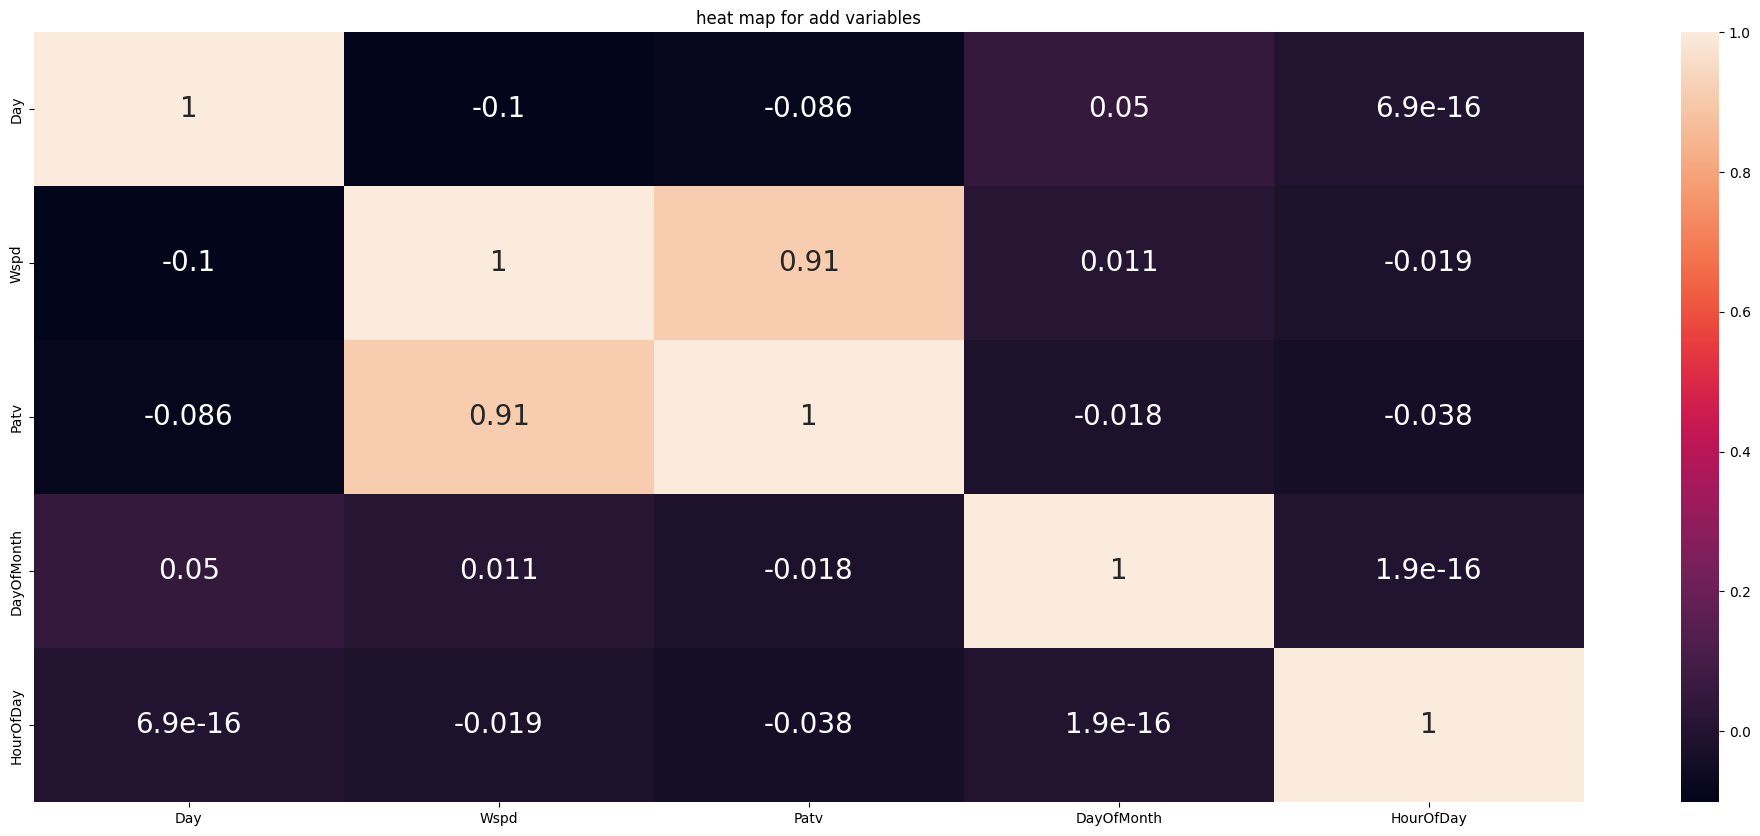

In [40]:
#绘制新增变量的热力图
import seaborn as sns
import matplotlib.pyplot as plt
data = data[['Day', 'Wspd', 'Patv', 'DayOfMonth', 'HourOfDay']]
corr = data.corr()
plt.figure(figsize=(25,10))
ax = sns.heatmap(corr,annot=True,square=False,annot_kws={"fontsize":20})
ax.set_title("heat map for add variables")

plt.show()
fig = ax.get_figure()
fig.savefig('addVariablesHeatMap')